### Importing relevant libraries

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import CategoricalAccuracy, Precision, Recall
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading and Pre-processing the data

In [3]:
# Loading the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


 **The output variable have 10 posible values.
This is a multiclass classification problem. We need to encode these lables to one hot vectors. We start by normalising the data and before that we convert data type to float for computation purposes.**

In [4]:
# Normalising the images to the range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0


In [5]:
# Converting labels to one-hot encoding (binary class vectors)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)


In [6]:
# Splitting training data to create a validation set
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

### Distribution of data

In [ ]:
print(f'Training set size: {train_images.shape}')
print(f'Validation set size: {val_images.shape}')
print(f'Test set size: {test_images.shape}')

Training set size: (40000, 32, 32, 3)
Validation set size: (10000, 32, 32, 3)
Test set size: (10000, 32, 32, 3)


In [ ]:
print(f'Training set labels size: {train_labels.shape}')
print(f'Validation set labels size: {val_labels.shape}')
print(f'Test set labels size: {test_labels.shape}')

Training set labels size: (40000, 10)
Validation set labels size: (10000, 10)
Test set labels size: (10000, 10)


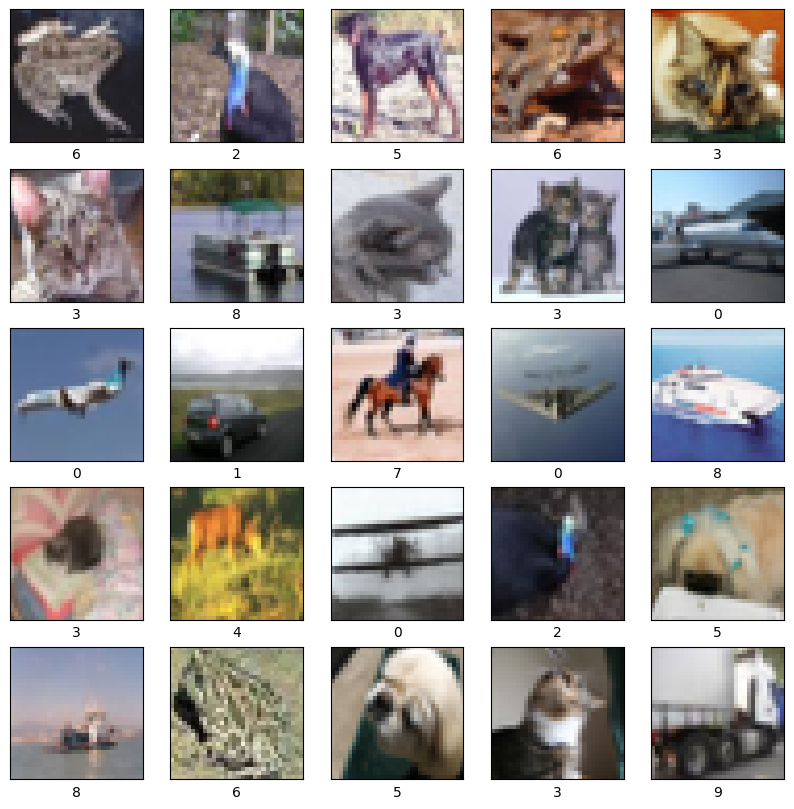

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(np.argmax(train_labels[i]))
plt.show()

Replotting them with their class names

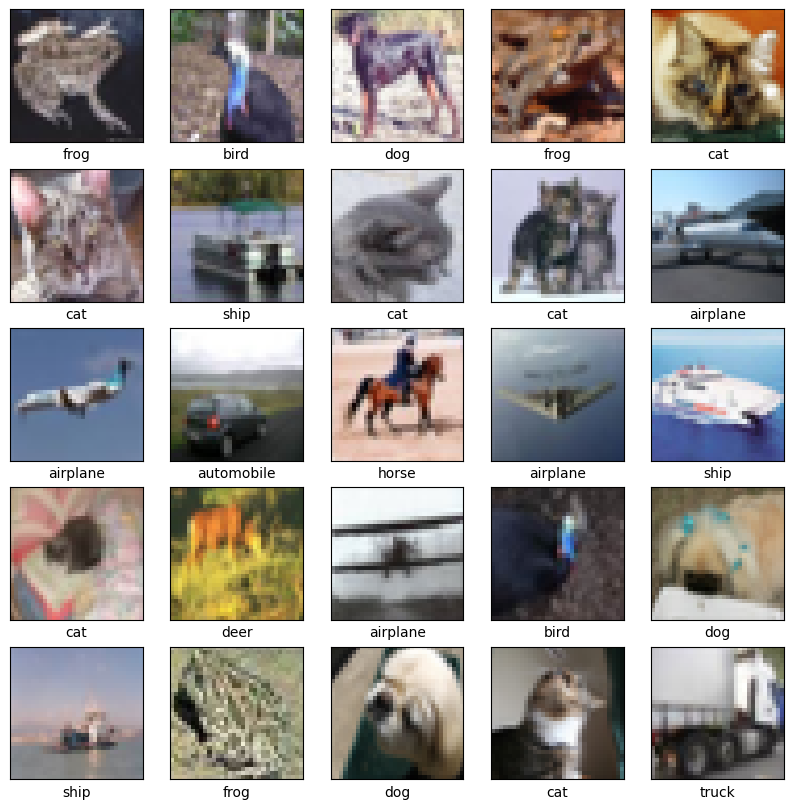

In [20]:
# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # Converting the CIFAR labels from one-hot encoding
    plt.xlabel(class_names[train_labels[i].argmax()])
plt.show()


## Defining the model's architecture using Convolutional Neural Network (CNN)

### Model 1

In [ ]:
def create_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 2048)              0

## Compile and Train the Model

In [ ]:
model = create_model()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/20
625/625 [==============================] - 65s 101ms/step - loss: 1.5923 - accuracy: 0.4124 - val_loss: 1.3016 - val_accuracy: 0.5411
Epoch 2/20
625/625 [==============================] - 61s 98ms/step - loss: 1.2161 - accuracy: 0.5687 - val_loss: 1.1179 - val_accuracy: 0.6087
Epoch 3/20
625/625 [==============================] - 62s 99ms/step - loss: 1.0447 - accuracy: 0.6318 - val_loss: 1.0075 - val_accuracy: 0.6489
Epoch 4/20
625/625 [==============================] - 63s 101ms/step - loss: 0.9220 - accuracy: 0.6782 - val_loss: 0.9016 - val_accuracy: 0.6828
Epoch 5/20
625/625 [==============================] - 64s 102ms/step - loss: 0.8263 - accuracy: 0.7094 - val_loss: 0.8611 - val_accuracy: 0.6988
Epoch 6/20
625/625 [==============================] - 63s 101ms/step - loss: 0.7542 - accuracy: 0.7361 - val_loss: 0.8183 - val_accuracy: 0.7165
Epoch 7/20
625/625 [==============================] - 61s 98ms/step - loss: 0.6846 - accuracy: 0.7587 - val_loss: 0.8011 - val_accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history_1 = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/10
625/625 [==============================] - 71s 111ms/step - loss: 1.5631 - accuracy: 0.4290 - val_loss: 1.2616 - val_accuracy: 0.5565
Epoch 2/10
625/625 [==============================] - 77s 123ms/step - loss: 1.1873 - accuracy: 0.5775 - val_loss: 1.0361 - val_accuracy: 0.6286
Epoch 3/10
625/625 [==============================] - 69s 110ms/step - loss: 1.0120 - accuracy: 0.6434 - val_loss: 0.9248 - val_accuracy: 0.6697
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 0.8890 - accuracy: 0.6885 - val_loss: 0.8884 - val_accuracy: 0.6906
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.7919 - accuracy: 0.7223 - val_loss: 0.8579 - val_accuracy: 0.7030
Epoch 6/10
625/625 [==============================] - 69s 111ms/step - loss: 0.7128 - accuracy: 0.7486 - val_loss: 0.8611 - val_accuracy: 0.7025
Epoch 7/10
625/625 [==============================] - 69s 111ms/step - loss: 0.6432 - accuracy: 0.7731 - val_loss: 0.8563 - val_ac

In [ ]:
history_3 = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(val_images, val_labels))

Epoch 1/5
625/625 [==============================] - 62s 99ms/step - loss: 0.1326 - accuracy: 0.9540 - val_loss: 1.4805 - val_accuracy: 0.7349
Epoch 2/5
625/625 [==============================] - 64s 102ms/step - loss: 0.1282 - accuracy: 0.9554 - val_loss: 1.4941 - val_accuracy: 0.7297
Epoch 3/5
625/625 [==============================] - 67s 108ms/step - loss: 0.1276 - accuracy: 0.9555 - val_loss: 1.6463 - val_accuracy: 0.7277
Epoch 4/5
625/625 [==============================] - 62s 99ms/step - loss: 0.1285 - accuracy: 0.9549 - val_loss: 1.5010 - val_accuracy: 0.7353
Epoch 5/5
584/625 [===========================>..] - ETA: 3s - loss: 0.1205 - accuracy: 0.9581

In [ ]:
history_4 = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1250/1250 [==============================] - 73s 58ms/step - loss: 0.2560 - accuracy: 0.9145 - val_loss: 1.5472 - val_accuracy: 0.7120
Epoch 2/20
1250/1250 [==============================] - 74s 59ms/step - loss: 0.2079 - accuracy: 0.9315 - val_loss: 1.4501 - val_accuracy: 0.7294
Epoch 3/20
1250/1250 [==============================] - 69s 55ms/step - loss: 0.1825 - accuracy: 0.9393 - val_loss: 1.5367 - val_accuracy: 0.7313
Epoch 4/20
1250/1250 [==============================] - 70s 56ms/step - loss: 0.1915 - accuracy: 0.9366 - val_loss: 1.5853 - val_accuracy: 0.7242
Epoch 5/20
1250/1250 [==============================] - 69s 55ms/step - loss: 0.1813 - accuracy: 0.9393 - val_loss: 1.6601 - val_accuracy: 0.7248
Epoch 6/20
1250/1250 [==============================] - 70s 56ms/step - loss: 0.1833 - accuracy: 0.9388 - val_loss: 1.5844 - val_accuracy: 0.7261
Epoch 7/20
1250/1250 [==============================] - 69s 55ms/step - loss: 0.1844 - accuracy: 0.9376 - val_loss: 1.6652 -

## Analysing the model

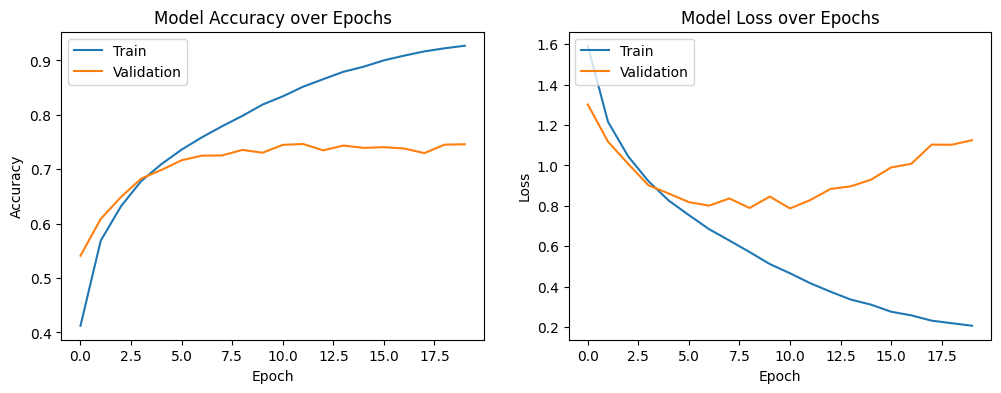

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

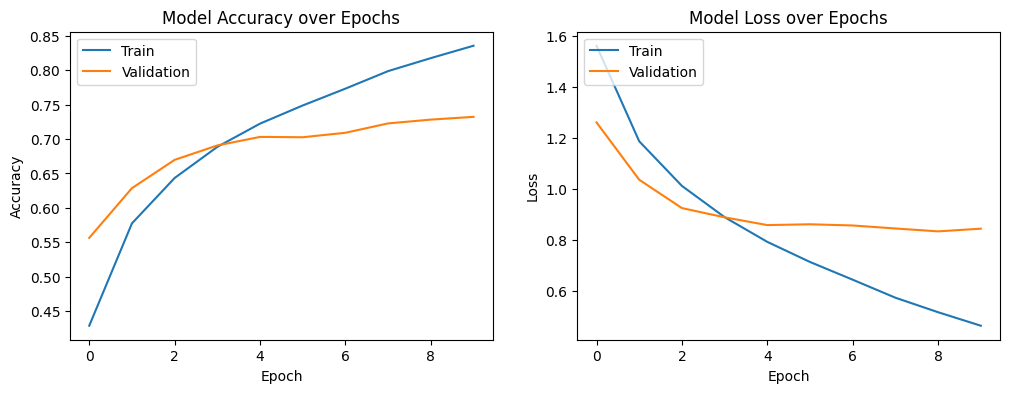

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

The model seems to be overfitting. This is observed through:



*  Model Accuracy Over Epochs: The training accuracy continues to improve as training progresses, which is good. However, the validation accuracy plateaus and even starts to decline slightly after a certain number of epochs. This divergence suggests that while the model is getting better at predicting the training data, it is not improving on the validation set.
*  Model Loss Over Epochs: The training loss decreases steadily, which is typical during training. However, the validation loss decreases initially but then begins to increase, which is a classic sign of overfitting. This indicates the model is starting to learn the noise in the training data rather than generalizing from it.

To address this different approaches will be investigated


1.   Add Dropout: Dropout is a regularization technique where randomly selected neurons are ignored during training. This helps in preventing the network from becoming too dependent on any single or a group of neurons. The dropout rateis adjusted to see how it affects performance.
2.   Early Stopping: This method stops training as soon as the validation performance starts deteriorating, despite improvements in training performance.
3.   Batch normalisation
4.   Data Augmentation







## Data Augmentation, Early Stopping and Batch Normalisation




In [ ]:
# Define a new model structure
model_2 = Sequential()

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model_2.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

# FLATTEN => DENSE => RELU => DROPOUT
model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))

# Softmax classifier
model_2.add(Dense(10))
model_2.add(Activation('softmax'))

model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
# Defining the learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.0001,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

# Initiating RMSprop optimizer with learning rate schedule
opt = RMSprop(learning_rate=lr_schedule)

# Compiling the model
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [ ]:
data_augmentation = False
history = None
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_2.fit(train_images, train_labels,
              batch_size=32,
              epochs=100,
              validation_data=(val_images, val_labels),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)


    datagen.fit(train_images)
    history_data_augmentation = model_2.fit_generator(datagen.flow(train_images, train_labels,
                                    batch_size=32),
                                    epochs=100,
                                    validation_data=(val_images, val_labels),
                                    workers=4)

Not using data augmentation.
Epoch 1/100
1250/1250 [==============================] - 193s 153ms/step - loss: 1.8971 - accuracy: 0.3042 - val_loss: 1.6332 - val_accuracy: 0.3970
Epoch 2/100
1250/1250 [==============================] - 188s 150ms/step - loss: 1.5800 - accuracy: 0.4257 - val_loss: 1.4233 - val_accuracy: 0.4937
Epoch 3/100
1250/1250 [==============================] - 199s 159ms/step - loss: 1.4328 - accuracy: 0.4841 - val_loss: 1.3269 - val_accuracy: 0.5333
Epoch 4/100
1250/1250 [==============================] - 211s 169ms/step - loss: 1.3379 - accuracy: 0.5237 - val_loss: 1.2210 - val_accuracy: 0.5680
Epoch 5/100
1250/1250 [==============================] - 187s 149ms/step - loss: 1.2573 - accuracy: 0.5525 - val_loss: 1.1548 - val_accuracy: 0.5930
Epoch 6/100
1250/1250 [==============================] - 203s 162ms/step - loss: 1.1879 - accuracy: 0.5805 - val_loss: 1.0935 - val_accuracy: 0.6162
Epoch 7/100
1250/1250 [==============================] - 183s 146ms/step - lo

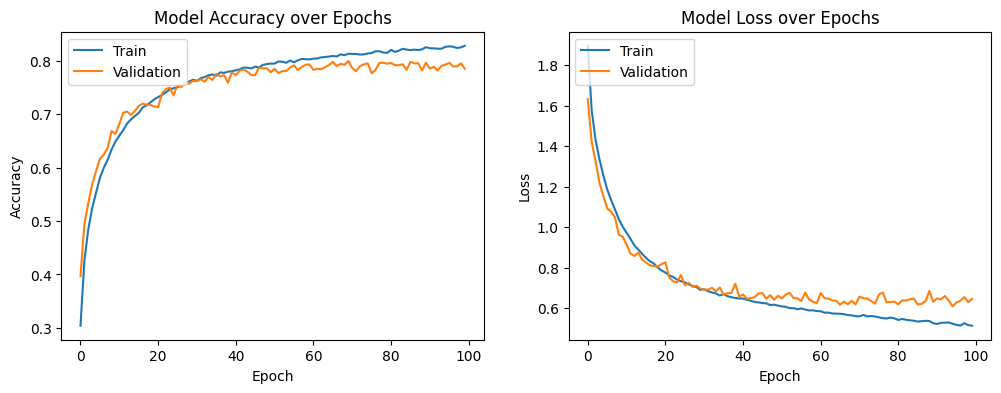

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Model 3

In [7]:
# Model_3
model_3 = Sequential([
    Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(32, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Increased dropout

    Conv2D(64, (3, 3), padding='same'),
    Activation('relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),  # Increased dropout

    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.5),
    Dense(10),
    Activation('softmax')
])
model_3.summary()

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                     

In [8]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,           # To display messages when stopping
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)


In [9]:
data_augmentation = True
history_data_augmentation = None
if not data_augmentation:
    print('Not using data augmentation.')
    history = model_2.fit(train_images, train_labels,
              batch_size=32,
              epochs=100,
              validation_data=(val_images, val_labels),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
       datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        zca_epsilon=1e-06,
        rotation_range=0,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.,
        zoom_range=0.,
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    datagen.fit(train_images)
    history_data_augmentation = model_3.fit(datagen.flow(train_images, train_labels, batch_size=32),
                                                epochs=100,
                                                validation_data=(val_images, val_labels),
                                                callbacks=[early_stopping],
                                                workers=4
                                               )

Using real-time data augmentation.
Epoch 1/100
1250/1250 [==============================] - 228s 180ms/step - loss: 1.7509 - accuracy: 0.3648 - val_loss: 1.7732 - val_accuracy: 0.3754
Epoch 2/100
1250/1250 [==============================] - 206s 165ms/step - loss: 1.4272 - accuracy: 0.4859 - val_loss: 1.1691 - val_accuracy: 0.5728
Epoch 3/100
1250/1250 [==============================] - 205s 164ms/step - loss: 1.2664 - accuracy: 0.5483 - val_loss: 1.0251 - val_accuracy: 0.6341
Epoch 4/100
1250/1250 [==============================] - 208s 167ms/step - loss: 1.1590 - accuracy: 0.5936 - val_loss: 0.9510 - val_accuracy: 0.6586
Epoch 5/100
1250/1250 [==============================] - 202s 161ms/step - loss: 1.0860 - accuracy: 0.6209 - val_loss: 0.9063 - val_accuracy: 0.6826
Epoch 6/100
1250/1250 [==============================] - 213s 170ms/step - loss: 1.0383 - accuracy: 0.6389 - val_loss: 0.9193 - val_accuracy: 0.6811
Epoch 7/100
1250/1250 [==============================] - 210s 168ms/ste

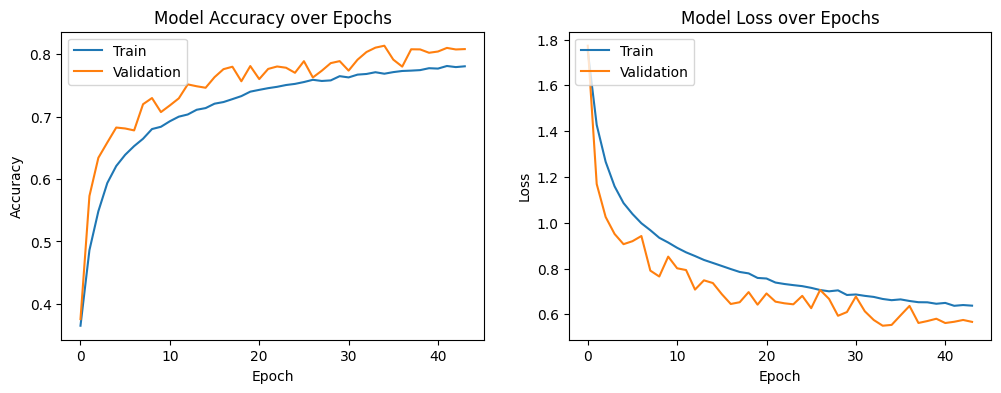

In [11]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_data_augmentation.history['accuracy'])
plt.plot(history_data_augmentation.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_data_augmentation.history['loss'])
plt.plot(history_data_augmentation.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Evaluating the model

In [13]:
test_loss, test_accuracy = model_3.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 12s 39ms/step - loss: 0.5646 - accuracy: 0.8096
Test accuracy: 0.8096


In [ ]:
print(classification_report(Y_true, Y_pred_classes))

In [30]:
predictions = model_3.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)

print(classification_report(true_classes, predicted_classes, target_names=class_names))


313/313 [==============================] - 16s 51ms/step
              precision    recall  f1-score   support

    airplane       0.81      0.87      0.84      1000
  automobile       0.90      0.93      0.91      1000
        bird       0.81      0.65      0.72      1000
         cat       0.74      0.56      0.64      1000
        deer       0.80      0.77      0.78      1000
         dog       0.75      0.72      0.73      1000
        frog       0.68      0.94      0.79      1000
       horse       0.86      0.85      0.86      1000
        ship       0.94      0.87      0.90      1000
       truck       0.85      0.93      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



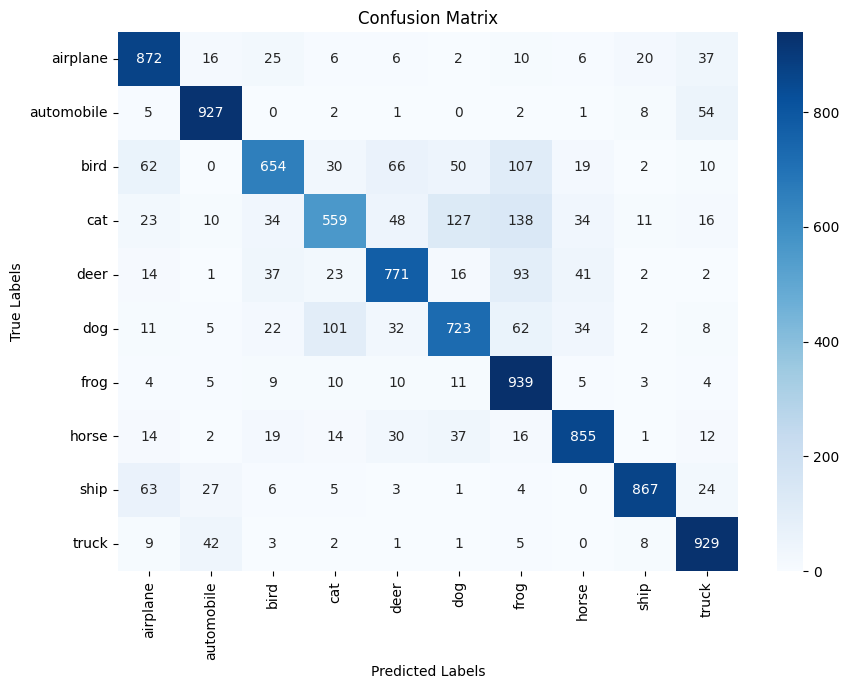

In [21]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


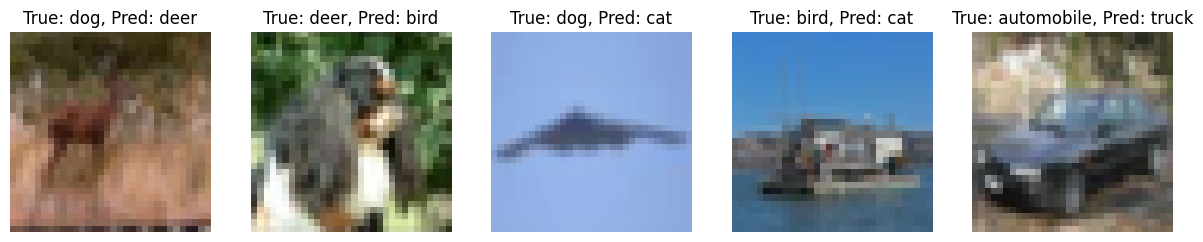

In [27]:
wrong_indices = [i for i, (true, pred) in enumerate(zip(true_classes, predicted_classes)) if true != pred]


plt.figure(figsize=(15, 5))
for i, index in enumerate(wrong_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(val_images[index])
    plt.title(f"True: {class_names[true_classes[index]]}, Pred: {class_names[predicted_classes[index]]}")
    plt.axis('off')
plt.show()

In [12]:
model_3.save('/content/drive/MyDrive/Masters/6_Machine Learning/CNN Assignment/CNN-Cifar10.keras')